# Futures

* Futures contract - an agreement to transact involving the future exchange of a set amount of assets for a price that is settled daily (marked to market daily).

The forward rate (future exchange rate)
$F =S_0*e^{(R_d-R_f)}T$
* F - future price
* $S_0$ - spot price (current exchange rate)
* $R_d$ - domestic risk-free rate
* $R_f$ - foreign deposit rate
* $T$ - maturity in years

In [ ]:
! pip install numpy_financial

In [ ]:
import numpy_financial as npf
import numpy as np
def futuresExchangeRate(s0,rateDomestic,rateForeign,T):
    futureEx=s0*np.exp((rateDomestic-rateForeign)*T)
    return futureEx

In [ ]:
s0=1.25 # exchange rate: £1 = $1.25
rHome=0.01 # domestic (US) risk-free rate
rForeigh=0.02 # foreign deposit rate
T=8./12. # maturity date (8 months from now)

futures=futuresExchangeRate(s0,rHome,rForeigh,T)
print("future exchange rate at maturity date =",futures)

future exchange rate at maturity date = 1.241694382818793


# Options

* Call option - an option that gives a purchaser the right, but not the obligation, to buy the underlying security from the writer of the option at a prespecified exercise price on or before a prespecified date.

* Put option - an option that gives a purchaser the right, but not the obligation, to sell the underlying security to the writer of the option at a prespecified price on or before a prespecified date.

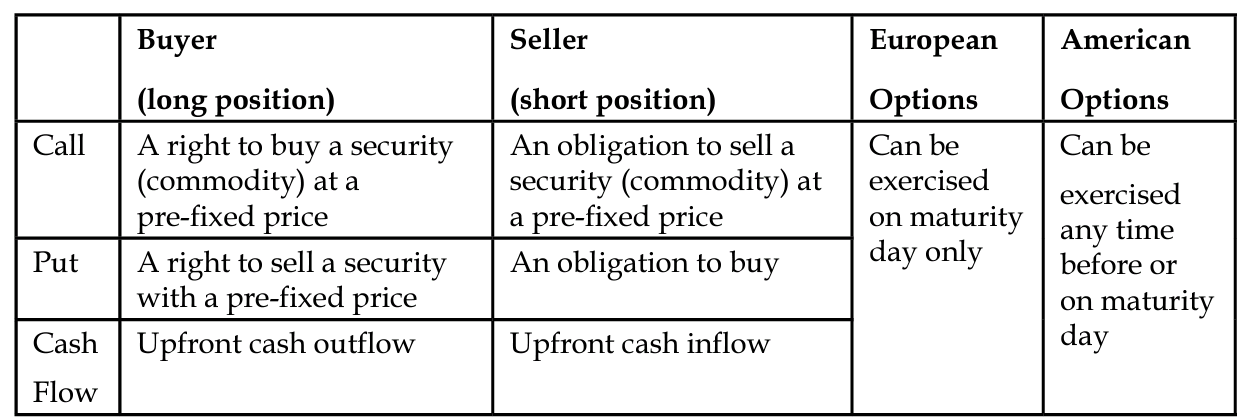

For a call option buyer:
* $profit/loss(call) = Max(S_t-X,0)-c$

For a call option seller:
 * $profit/loss(call) = c -Max(S_t-X,0)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  import sys


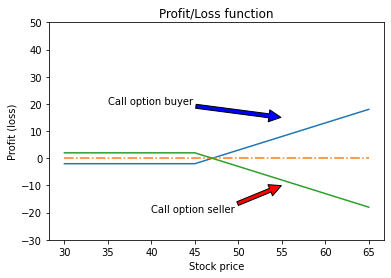

In [ ]:
import scipy as sp
import matplotlib.pyplot as plt
s = sp.arange(30,70,5)
x=45
c=2
y=(abs(s-x)+s-x)/2-c
y2=sp.zeros(len(s))
plt.ylim(-30,50)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.title("Profit/Loss function")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Call option buyer', xy=(55,15), xytext=(35,20), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.show()

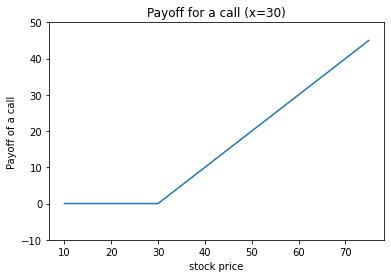

In [ ]:
# Call option buyer example

import numpy as np
import matplotlib.pyplot as plt
s = np.arange(10,80,5)
x=30
payoff=(abs(s-x)+s-x)/2
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a call (x=30)")
plt.xlabel("stock price")
plt.ylabel("Payoff of a call")
plt.show()

For a put option buyer:
* $profit/loss(put) = Max(X-S_t,0)-p$

For a put option seller:
 * $profit/loss(put) = p-Max(X-S_t,0)$

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  import sys


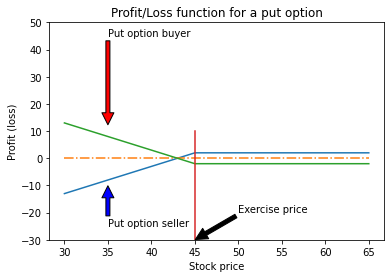

In [ ]:
import scipy as sp
import matplotlib.pyplot as plt
s = sp.arange(30,70,5)
x=45
p=2
y=p-(abs(x-s)+x-s)/2
y2=sp.zeros(len(s))
x3=[x, x]
y3=[-30,10]
plt.ylim(-30,50)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.plot(x3,y3)
plt.title("Profit/Loss function for a put option")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,45), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Exercise price', xy=(45,-30), xytext=(50,-20), arrowprops=dict(facecolor='black',shrink=0.01),)
plt.show()

Black-Scholes-Merton option model

$d_1 = \frac{ln(\frac{S_0}{X}+(r+\frac{1}{2}\sigma^2)T}{\sigma\sqrt{T}}$

$d_2 = d_1 - \sigma\sqrt{T}$

$c = S_0N(d_1)-Xe^{-rT}N(d_2)$
$p =Xe^{-rT}N(-d_2)-S_0N(-d_1)d_2$

* $S_0$ - current stock price
* $X$ - exercise price
* $r$ - risk-free rate
* $T$ - maturity in years
* $\sigma$ - volatility if the stock
* $c$ - call equation
* $p$ - put equation
* $N()$ - cumulative standard normal distribution

In [ ]:
from scipy import log,exp,sqrt,stats 
def bs_call(S,X,T,r,sigma): 
   d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
   d2 = d1-sigma*sqrt(T)
   return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)

In [ ]:
from scipy import log,exp,sqrt,stats 
def bs_put(S,X,T,r,sigma): 
   d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
   d2 = d1-sigma*sqrt(T)
   return X*exp(-r*T)*stats.norm.cdf(d2) - S*stats.norm.cdf(d1)

In [ ]:
# The current stock price is $40
# the strike price is $42
# the time to maturity is six months
# the risk-free rate is 1.5% 
# the volatility of the underlying stock is 20%

c=bs_call(40.,42.,0.5,0.015,0.2)
round(c,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  """


1.56

In [ ]:
# The current stock price is $43
# the strike price is $39
# the time to maturity is six months
# the risk-free rate is 1.5% 
# the volatility of the underlying stock is 20%

p=bs_put(43.,39.,0.5,0.015,0.2)
round(p,2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.log is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.log instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  """


-5.06

# Black-Scholes Partial Differential Equation (PDE)

$\frac{\partial V}{\partial t} + \frac{1}{2}\sigma^2S^2\frac{\partial^2 V}{\partial S^2} + rS\frac{\partial V}{\partial S} -rV = 0$

## Greeks 

Understanding the  risk-types that an option might involve is crucial for all market participants. The idea behind Greeks is to measure the different types of risks; they represent the sensitivity of the option to different factors. The Greeks of a plain vanilla option, $V$, are:  delta  ($\Delta$, sensitivity to the underlying price, $S$),  gamma ($\Gamma$, sensitivity of delta to the underlying price, delta of delta),  theta  ($\theta$, sensitivity to time), rho  ($\rho$ , sensitivity to the risk-free rate), and  vega  ($\nu$, sensitivity to the volatility).   In terms of mathematics, all Greeks are partial derivatives of the derivative price: 
 * $\Delta = \frac{\partial V}{\partial S}$
 * $\Gamma = \frac{\partial^2 V}{\partial S^2}$
 * $\theta = \frac{\partial V}{\partial t}$
 * $\rho = \frac{\partial V}{\partial r}$
 * $\nu = \frac{\partial V}{\partial \sigma}$

## Finite differences in option pricing

The motivation behind the finite differencing method is the application of the Black-Scholes Partial Differential Equation (PDE) framework (involving functions and their partial derivatives), where price $S(t)$ is a function of $f(S,t)$, with $r$ as the risk-free rate, $t$ as the time to maturity, S as max(S − K, 0) for a call option with strike K or max(K − S, 0) for a put option and σ as the volatility of the underlying security:

$rf = \frac{\partial f}{\partial t} + rS\frac{\partial f}{\partial s} + \frac{1}{2}\sigma^2S^2\frac{\partial^2 f}{\partial t^2}$

A number of ways to approximate the Black-Scholes PDE are as follows:
 * Forward difference: $\frac{\partial f}{\partial S} = \frac{f_{i+1,j}-f_{i,j}}{\partial S}$, $\frac{\partial f}{\partial t} = \frac{f_{i,j+1}-f_{i,j}}{\partial t}$
 * Backward difference: $\frac{\partial f}{\partial S} = \frac{f_{i,j}-f_{i-1,j}}{\partial S}$, $\frac{\partial f}{\partial t} = \frac{f_{i,j}-f_{i,j-1}}{\partial t}$
 * Central or symmetric difference: $\frac{\partial f}{\partial S} = \frac{f_{i+1,j}-f_{i-1,j}}{\partial S}$, $\frac{\partial f}{\partial t} = \frac{f_{i,j+1}-f_{i,j-1}}{\partial t}$
 * The second derivative: $\frac{\partial^2f}{\partial S^2} = \frac{f_{i+1,j}-2f_{i,j}+f_{i-1,j}}{\partial S^2}$

In [ ]:
from abc import ABC, abstractmethod
import numpy as np

""" 
Base class for sharing 
attributes and functions of FD 
"""
class FiniteDifferences(object):
  def __init__(self, S0, K, r=0.05, T=1, sigma=0, Smax=1, M=1, N=1, is_put=False):
    self.S0 = S0
    self.K = K
    self.r = r
    self.T = T
    self.sigma = sigma
    self.Smax = Smax
    self.M, self.N = M, N
    self.is_call = not is_put
            
    self.i_values = np.arange(self.M)
    self.j_values = np.arange(self.N)
    self.grid = np.zeros(shape=(self.M+1, self.N+1))
    self.boundary_conds = np.linspace(0, Smax, self.M+1)
            
  @abstractmethod
  def setup_boundary_conditions(self):
    raise NotImplementedError('Implementation required!')
  @abstractmethod
  def setup_coefficients(self):
    raise NotImplementedError('Implementation required!')

  @abstractmethod
  def traverse_grid(self):
    """  Iterate the grid backwards in time"""
    raise NotImplementedError('Implementation required!')

  @abstractmethod
  def interpolate(self):
    """ Use piecewise linear interpolation on the initial
    grid column to get the closest price at S0.
    """
    return np.interp(
      self.S0, self.boundary_conds, self.grid[:,0])

  @property
  def dS(self):
    return self.Smax/float(self.M)

  @property
  def dt(self):
    return self.T/float(self.N)

  def price(self):
    self.setup_boundary_conditions()
    self.setup_coefficients()
    self.traverse_grid()
    return self.interpolate()

## The explicit method
The explicit method for approximating $f_{i,j}$ is given by the following equation:
$rf_{i,j} = \frac{f_{i,j}-f_{i,j-1}}{\partial t} + r_i*\partial S\frac{f_{i+1,j}-f_{i-1,j}}{2\partial s}\frac{1}{2}\sigma^2j^2\frac{f_{i+1,j}-f_{i-1,j}}{\partial s^2}$

In [ ]:
import numpy as np
""" 
Explicit method of Finite Differences 
"""
class FDExplicitEu(FiniteDifferences):
  def setup_boundary_conditions(self):
    if self.is_call:
      self.grid[:,-1] = np.maximum(0, self.boundary_conds - self.K)
      self.grid[-1,:-1] = (self.Smax-self.K) * np.exp(-self.r*self.dt*(self.N-self.j_values))
    else:
      self.grid[:,-1] = np.maximum(0, self.K-self.boundary_conds)
      self.grid[0,:-1] = (self.K-self.Smax) * np.exp(-self.r*self.dt*(self.N-self.j_values))

  def setup_coefficients(self):
    self.a = 0.5*self.dt*((self.sigma**2) * (self.i_values**2) - self.r*self.i_values)
    self.b = 1 - self.dt*((self.sigma**2) * (self.i_values**2) + self.r)
    self.c = 0.5*self.dt*((self.sigma**2) * (self.i_values**2) + self.r*self.i_values)

  def traverse_grid(self):
    for j in reversed(self.j_values):
      for i in range(self.M)[2:]:
        self.grid[i,j] = self.a[i]*self.grid[i-1,j+1] + self.b[i]*self.grid[i,j+1] + self.c[i]*self.grid[i+1,j+1]

In [ ]:
# The current stock price is $40
# the call strike price is $42
# the time to maturity is six months
# the risk-free rate is 1.5% 
# the volatility of the underlying stock is 20%

option = FDExplicitEu(40, 42, r=0.015, T=6./12., sigma=0.2, Smax=100, M=100, N=1000, is_put=True)
print(option.price())

3.2352030783967707


## The implicit method
The implicit method for approximating $f_{i,j}$ is given by the following equation:
$rf_{i,j} = \frac{f_{i,j+1}-f_{i,j}}{\partial t} + r_i*\partial S\frac{f_{i+1,j}-f_{i-1,j}}{2\partial s}\frac{1}{2}\sigma^2j^2\frac{f_{i+1,j}-2f_{i,j}+f_{i-1,j}}{\partial s^2}$

In [ ]:
import numpy as np
import scipy.linalg as linalg
""" 
Implicit method of Finite Differences 
"""
class FDImplicitEu(FDExplicitEu):
  def setup_coefficients(self):
    self.a = 0.5*(self.r*self.dt*self.i_values - (self.sigma**2) * self.dt * (self.i_values**2))
    self.b = 1 + (self.sigma**2) * self.dt*(self.i_values**2) + self.r*self.dt
    self.c = -0.5*(self.r*self.dt*self.i_values + (self.sigma**2)*self.dt*(self.i_values**2))
    self.coeffs = np.diag(self.a[2:self.M],-1) + np.diag(self.b[1:self.M]) + np.diag(self.c[1:self.M-1],1)

  def traverse_grid(self):
    """ Solve using linear systems of equations """
    P, L, U = linalg.lu(self.coeffs)
    aux = np.zeros(self.M-1)

    for j in reversed(range(self.N)):
      aux[0] = np.dot(-self.a[1], self.grid[0, j])
      x1 = linalg.solve(L, self.grid[1:self.M, j+1]+aux)
      x2 = linalg.solve(U, x1)
      self.grid[1:self.M, j] = x2

In [ ]:
# The current stock price is $40
# the call strike price is $42
# the time to maturity is six months
# the risk-free rate is 1.5% 
# the volatility of the underlying stock is 20%

option = FDImplicitEu(40, 42, r=0.015, T=6./12., sigma=0.2, Smax=100, M=100, N=1000, is_put=True)
print(option.price())

3.2347266002746515


## The Crank-Nicolson method
The Crank-Nicolson method for approximating $f_{i,j}$ is given by the following equation: $\frac{1}{2}rf_{i,j-1}+\frac{1}{2}rf_{i,j} = \frac{f_{i,j}-f_{i,j-1}}{\partial t}\frac{1}{2}r_{i}*\partial S\frac{f_{i+1,j-1}-f_{i-1,j-1}}{2\partial S}+\frac{1}{2}r_i\partial S\frac{f_{i+1,j}-f_{i-1,j}}{2\partial S} +\frac{1}{4}\sigma^2i^2\partial S^2\frac{f_{i+1,j-1}-2f_{i,j-1}+f_{i-1,j-1}}{\partial S^2}+\frac{1}{4}\sigma^2i^2\partial S^2\frac{f_{i+1,j}-2f_{i,j}+f_{i-1,j}}{\partial S^2}$

In [ ]:
import numpy as np
import scipy.linalg as linalg
""" 
Crank-Nicolson method of Finite Differences 
"""
class FDCnEu(FDExplicitEu):
  def setup_coefficients(self):
    self.alpha = 0.25*self.dt*((self.sigma**2)*(self.i_values**2) - self.r*self.i_values)
    self.beta = -self.dt*0.5*((self.sigma**2)*(self.i_values**2) + self.r)
    self.gamma = 0.25*self.dt*((self.sigma**2)*(self.i_values**2) + self.r*self.i_values)
    self.M1 = -np.diag(self.alpha[2:self.M], -1) + np.diag(1-self.beta[1:self.M]) - np.diag(self.gamma[1:self.M-1], 1)
    self.M2 = np.diag(self.alpha[2:self.M], -1) + np.diag(1+self.beta[1:self.M]) + np.diag(self.gamma[1:self.M-1], 1)

  def traverse_grid(self):
    """ Solve using linear systems of equations """
    P, L, U = linalg.lu(self.M1)

    for j in reversed(range(self.N)):
      x1 = linalg.solve(L, np.dot(self.M2, self.grid[1:self.M, j+1]))
      x2 = linalg.solve(U, x1)
      self.grid[1:self.M, j] = x2

In [ ]:
# The current stock price is $40
# the call strike price is $42
# the time to maturity is six months
# the risk-free rate is 1.5% 
# the volatility of the underlying stock is 20%

option = FDCnEu(42, 40, r=0.015, T=6./12., sigma=0.2, Smax=100, M=100, N=1000, is_put=True)
print(option.price())

1.3253700725441924
